In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/jovyan/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
players = pd.read_csv('players.csv')

In [3]:
players.describe()

,player_id,current_club_id,height_in_cm,market_value_in_eur,highest_market_value_in_eur,last_season
count,2.845000e+04,28450.000000,28450.000000,1.951700e+04,2.737200e+04,28450.000000
mean,2.838953e+05,4025.653814,170.764323,2.072203e+06,3.518383e+06,2018.215466
std,2.256377e+05,9023.171446,44.630297,6.791570e+06,9.123070e+06,3.340755
min,1.000000e+01,3.000000,0.000000,1.000000e+04,1.000000e+04,2012.000000
25%,8.766400e+04,398.000000,176.000000,1.500000e+05,2.750000e+05,2015.000000
50%,2.399460e+05,1063.000000,182.000000,3.500000e+05,8.000000e+05,2019.000000
75%,4.209132e+05,2999.000000,187.000000,1.000000e+06,2.750000e+06,2021.000000
max,1.103981e+06,83678.000000,206.000000,1.800000e+08,2.000000e+08,2022.000000


In [4]:
players.shape

(28450, 23)

In [5]:
players.head(1).transpose()

,0
player_id,134354
name,Ian Raeymaekers
current_club_id,498
current_club_name,Ksc Lokeren
country_of_citizenship,Belgium
country_of_birth,Belgium
city_of_birth,Aalst
date_of_birth,1995-01-30
position,Attack
sub_position,Centre-Forward


# 1. Data Preperation and first look into the data

## 1.1 Market value compared by league (first try)

In [6]:
#We are interessted in the players market values, that is why we want that column to exclude null values
player_value = players[players['market_value_in_eur'].notnull()]
player_value.head()

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,...,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
2,76948,Pablo Olivera,979,Moreirense Fc,Uruguay,Uruguay,Melo,1987-12-08,Attack,Centre-Forward,...,600000.0,NaN,NaN,PO1,Pablo,Olivera,pablo-olivera,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/pablo-olivera/...
5,167061,Leighton McIntosh,511,Dundee Fc,Scotland,Scotland,Dundee,1993-02-06,Attack,Centre-Forward,...,175000.0,NaN,NaN,SC1,Leighton,McIntosh,leighton-mcintosh,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/leighton-mcint...
9,139735,Giannis Gesios,5219,Aok Kerkyra,Greece,Greece,Edessa,1988-08-03,Attack,Centre-Forward,...,300000.0,NaN,2023-06-30,GR1,Giannis,Gesios,giannis-gesios,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/giannis-gesios...
10,39049,Kei Kamara,1123,Norwich City,Sierra Leone,Sierra Leone,Kenema,1984-09-01,Attack,Centre-Forward,...,1000000.0,PROSPORT Management,2023-12-31,GB1,Kei,Kamara,kei-kamara,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/kei-kamara/pro...
11,46154,Chris Martin,1123,Norwich City,Scotland,England,Beccles,1988-11-04,Attack,Centre-Forward,...,4500000.0,After Sports Consultancy,2023-06-30,GB1,Chris,Martin,chris-martin,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/chris-martin/p...


In [7]:
#We want to make market value more readable
player_value['market_value_in_mil_eur'] = (player_value['market_value_in_eur'] / 1000000).round(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='current_club_domestic_competition_id', ylabel='market_value_in_mil_eur'>

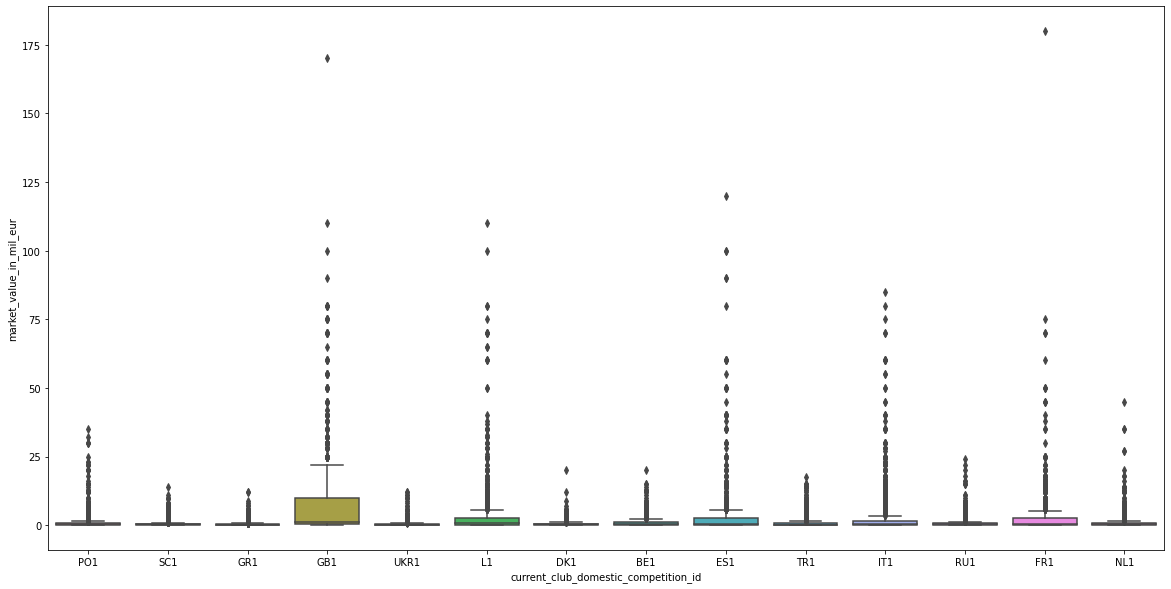

In [8]:
#A boxplot should help to understand the distribution and to see differences between leagues
plt.figure(figsize=(20,10))
sns.boxplot(x='current_club_domestic_competition_id', y='market_value_in_mil_eur', data=player_value)

In [9]:
#Because of the outliers we choose the median to compare the average market value between leagues
medians = player_value.groupby(['current_club_domestic_competition_id'])['market_value_in_mil_eur'].median().sort_values(ascending=False)
medians

current_club_domestic_competition_id
GB1     1.20
L1      0.65
ES1     0.60
FR1     0.60
BE1     0.40
NL1     0.40
DK1     0.30
IT1     0.30
PO1     0.30
RU1     0.30
SC1     0.30
GR1     0.25
TR1     0.20
UKR1    0.20
Name: market_value_in_mil_eur, dtype: float64

### Key Facts:
- The top 5 leagues by market value of players seem to be Great Britain, Germany, France, Spain, and Netherlands. Italy ranks on 10th. 
- That is kind of suprising if you are into football.
- We should look a little bit deeper into the data.

In [10]:
#to become a clearer view we compare the number of clubs between netherland and italy
players_NL1 = player_value[player_value["current_club_domestic_competition_id"]=='NL1']
NL1 = players_NL1.groupby('current_club_name').ngroups

players_IT1 = player_value[player_value["current_club_domestic_competition_id"]=='IT1']
IT1 = players_IT1.groupby('current_club_name').ngroups

print("Number of Clubs NL:" + str(NL1))
print("Number of Clubs IT:" + str(IT1))

Number of Clubs NL:27
Number of Clubs IT:37


### Key Facts
- The difference between number of clubs etween Italy and netherlands is 10
- Maybe there are more clubs than the current tier 1 league clubs in the dataset
- we should look into the status of the players

In [11]:
#lets see when the players in the dataset had there last season  
player_value['last_season'].value_counts()

2022    6478
2021    3417
2020    2112
2018    1584
2019    1432
2017    1000
2016     955
2015     727
2013     710
2014     702
2012     400
Name: last_season, dtype: int64

### Key Facts: 
- there are players in the dataset which are not longer "active"
- we should only look into players that had the last season in 2022 and have a a contract expiration date greater than 2022

## 1.2 Market value Market value compared by league (second try)

In [12]:
#filter dataset on lastseason equals 2022
active_players = player_value[player_value['last_season']==2022]

In [13]:
#we look into the contract expiration date to see if there are players with an expired contract
active_players['contract_expiration_date'].value_counts()

2023-06-30    1961
2024-06-30    1367
2025-06-30    1217
2026-06-30     813
2027-06-30     415
2023-05-31     136
2024-05-31     104
2025-05-31      59
2028-06-30      45
2024-12-31      26
2023-12-31      26
2025-12-31      23
2026-05-31      23
2026-12-31      20
2027-12-31       9
2025-09-30       5
2029-06-30       4
2027-05-31       4
2031-06-30       3
2030-06-30       3
2028-05-31       3
2025-01-31       1
2024-10-31       1
2026-09-30       1
2026-01-31       1
Name: contract_expiration_date, dtype: int64

### Key Facts: 
- there are no players with an expired contract anymore
- we can now do the comparison of leagues again

In [14]:
active_players.shape

(6478, 24)

<AxesSubplot:xlabel='current_club_domestic_competition_id', ylabel='market_value_in_mil_eur'>

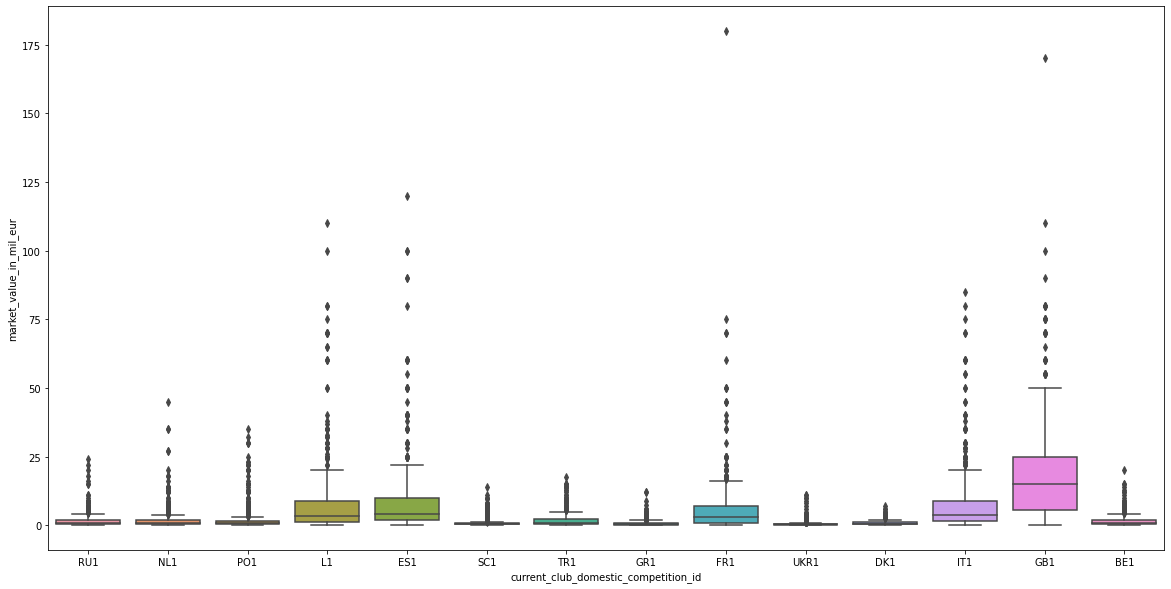

In [15]:
#Again a boxplot should help to understand the distribution and to see differences between leagues of our new dataset
plt.figure(figsize=(20,10))
sns.boxplot(x='current_club_domestic_competition_id', y='market_value_in_mil_eur', data=active_players)

In [16]:
#First we look into the market value of all players per league
(active_players[['market_value_in_mil_eur','current_club_domestic_competition_id']]
 .groupby('current_club_domestic_competition_id')
 .sum()
 .sort_values('market_value_in_mil_eur', ascending=False)
 .head(10))

,market_value_in_mil_eur
current_club_domestic_competition_id,
GB1,10320.35
ES1,4826.50
IT1,4550.30
L1,4290.08
FR1,3352.45
PO1,1167.22
NL1,1027.33
TR1,993.28
BE1,826.23


In [17]:
#Because of the outliers we choose the median too to compare the average market value between leagues
medians = active_players.groupby(['current_club_domestic_competition_id'])['market_value_in_mil_eur'].median().sort_values(ascending=False)
medians

current_club_domestic_competition_id
GB1     15.000
ES1      4.000
IT1      3.700
L1       3.500
FR1      3.000
TR1      0.850
BE1      0.800
RU1      0.800
NL1      0.700
PO1      0.700
DK1      0.475
GR1      0.450
SC1      0.400
UKR1     0.300
Name: market_value_in_mil_eur, dtype: float64

### Key Facts:
- The top 5 leagues by market value of players are now Great Britain, Spain, Italy, Germany and France. Netherlands ranks on 9th. 
- That seems to be more realitsicout of football fan perspective

## 1.3 Top 10 Clubs by players market value

In [18]:
(active_players[['market_value_in_mil_eur','current_club_name','current_club_domestic_competition_id']]
 .groupby(['current_club_name','current_club_domestic_competition_id'])
 .sum()
 .sort_values('market_value_in_mil_eur', ascending=False)
 .head(10))

,,market_value_in_mil_eur
current_club_name,current_club_domestic_competition_id,
Manchester City,GB1,1048.80
Fc Chelsea,GB1,1044.50
Fc Bayern Munchen,L1,995.70
Fc Liverpool,GB1,931.00
Fc Paris Saint Germain,FR1,889.05
Real Madrid,ES1,849.00
Fc Arsenal,GB1,803.00
Fc Barcelona,ES1,762.00
Manchester United,GB1,756.10


### Key Facts:
- Six out of ten clubs with the highest players market value are from Great Britain
- The other four clubs are from Spain, Germany and France and again not from Italy, despite Italy is ranked number three of Leagues by players market value
- This means that italian clubs have viewer outliers in players market value, so the range should be smaler than in France and Germany for example (see boxplot 1.2)

## 1.4 Top 10 Players by market value

In [19]:
active_players[['name','market_value_in_mil_eur','current_club_domestic_competition_id', 'position']].sort_values('market_value_in_mil_eur', ascending=False).head(10)

,name,market_value_in_mil_eur,current_club_domestic_competition_id,position
22597,Kylian Mbappé,180.0,FR1,Attack
25024,Erling Haaland,170.0,GB1,Attack
27506,Vinicius Junior,120.0,ES1,Attack
25030,Phil Foden,110.0,GB1,Midfield
26888,Jude Bellingham,110.0,L1,Midfield
26124,Jamal Musiala,100.0,L1,Attack
27520,Pedri,100.0,ES1,Midfield
27500,Federico Valverde,100.0,ES1,Midfield
25164,Bukayo Saka,100.0,GB1,Attack
25059,Harry Kane,90.0,GB1,Attack


### Key Facts:
- Four players are from Great Britain, followed by Spain with three, Germany with two and France with one player
- Again Italy is not ranked with players within the top ten
- The player with the highest market value is from France
- six players of the top ten are attakers
- four players are midfielder (no defender)

## 1.5 Possible features for market value prediciton

<AxesSubplot:xlabel='position', ylabel='market_value_in_mil_eur'>

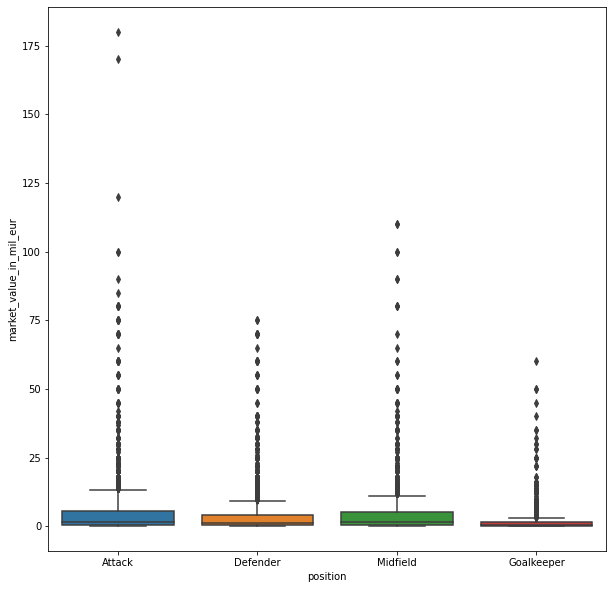

In [20]:
#position by market value
plt.figure(figsize=(10,10))
sns.boxplot(x='position', y='market_value_in_mil_eur', data=active_players)

<AxesSubplot:xlabel='sub_position', ylabel='market_value_in_mil_eur'>

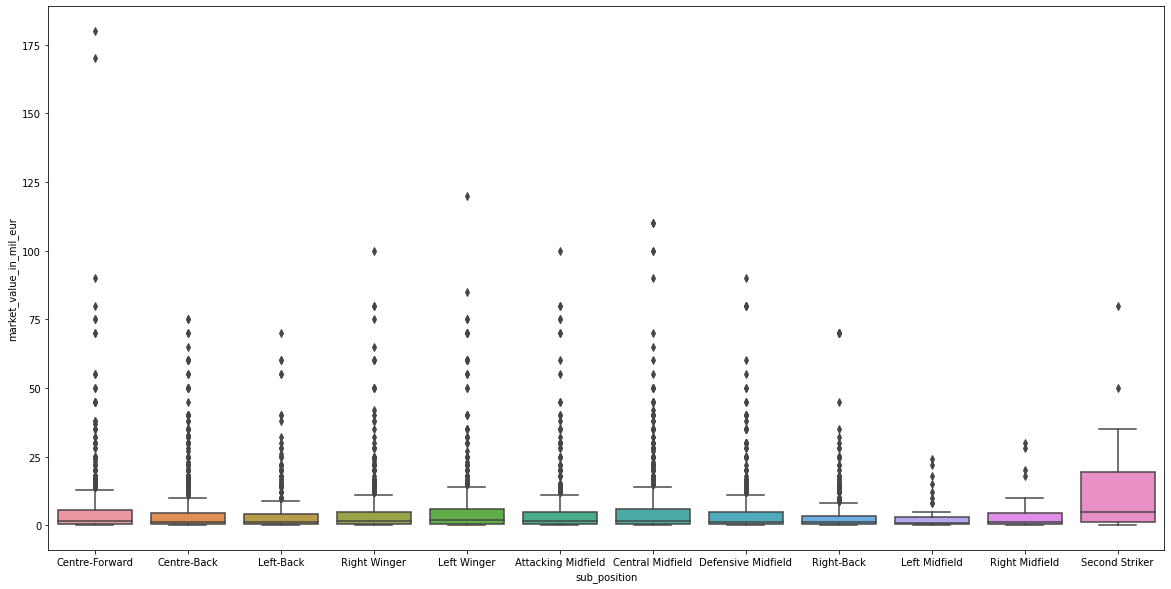

In [21]:
#subposition by market value
plt.figure(figsize=(20,10))
sns.boxplot(x='sub_position', y='market_value_in_mil_eur', data=active_players)

<AxesSubplot:xlabel='foot', ylabel='market_value_in_mil_eur'>

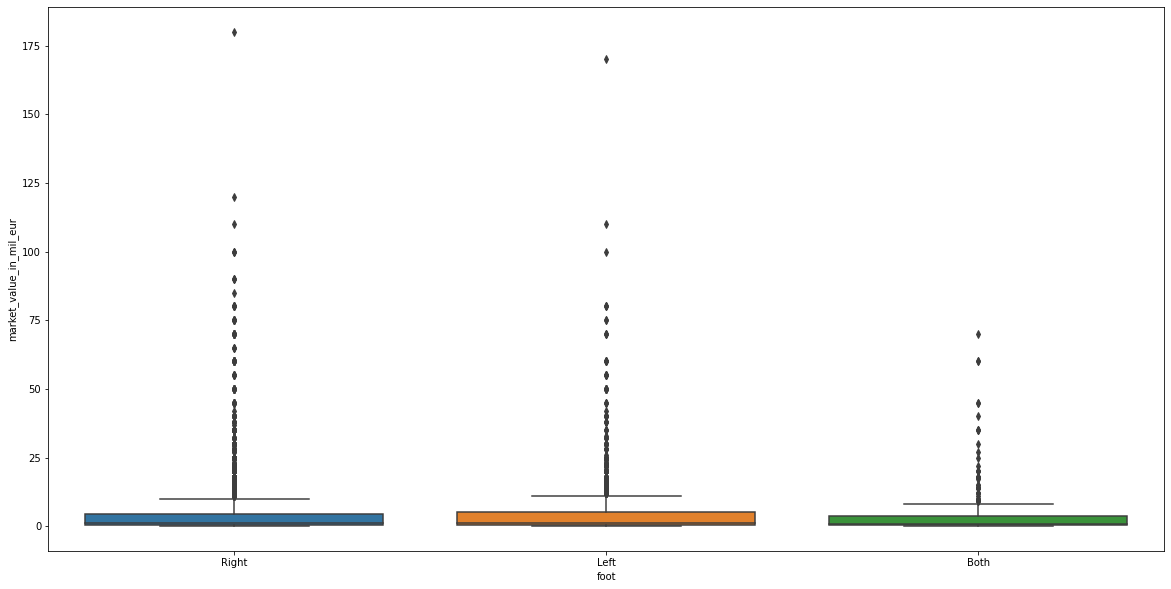

In [22]:
#foot by market value
plt.figure(figsize=(20,10))
sns.boxplot(x='foot', y='market_value_in_mil_eur', data=active_players)

## 1.6 Creating dummy variables as preperation for linear model

In [23]:
#getting dummy variables for prediction
players_dummy = pd.get_dummies(active_players[['position','sub_position','foot','current_club_domestic_competition_id']])
players_dummy['height_in_cm'] = active_players['height_in_cm']
players_dummy['player_id'] = active_players['player_id']
players_dummy['market_value_in_mil_eur'] = active_players['market_value_in_mil_eur']

#players_dummy['contract_length'] = (players['contract_expiration_date']-players['last_season'])
#players_dummy['age'] = (players['last_season']-players['date_of_birth'])

players_dummy

,position_Attack,position_Defender,position_Goalkeeper,position_Midfield,sub_position_Attacking Midfield,sub_position_Central Midfield,sub_position_Centre-Back,sub_position_Centre-Forward,sub_position_Defensive Midfield,sub_position_Left Midfield,...,current_club_domestic_competition_id_L1,current_club_domestic_competition_id_NL1,current_club_domestic_competition_id_PO1,current_club_domestic_competition_id_RU1,current_club_domestic_competition_id_SC1,current_club_domestic_competition_id_TR1,current_club_domestic_competition_id_UKR1,height_in_cm,player_id,market_value_in_mil_eur
21921,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,175,987700,0.30
21922,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,188,185245,11.00
21923,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,180,241486,0.45
21924,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,192,401931,0.30
21925,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,187,322073,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28445,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,192,582232,1.00
28446,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,191,518472,3.00
28447,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,170,289643,1.20
28448,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,195,213429,0.80


<AxesSubplot:>

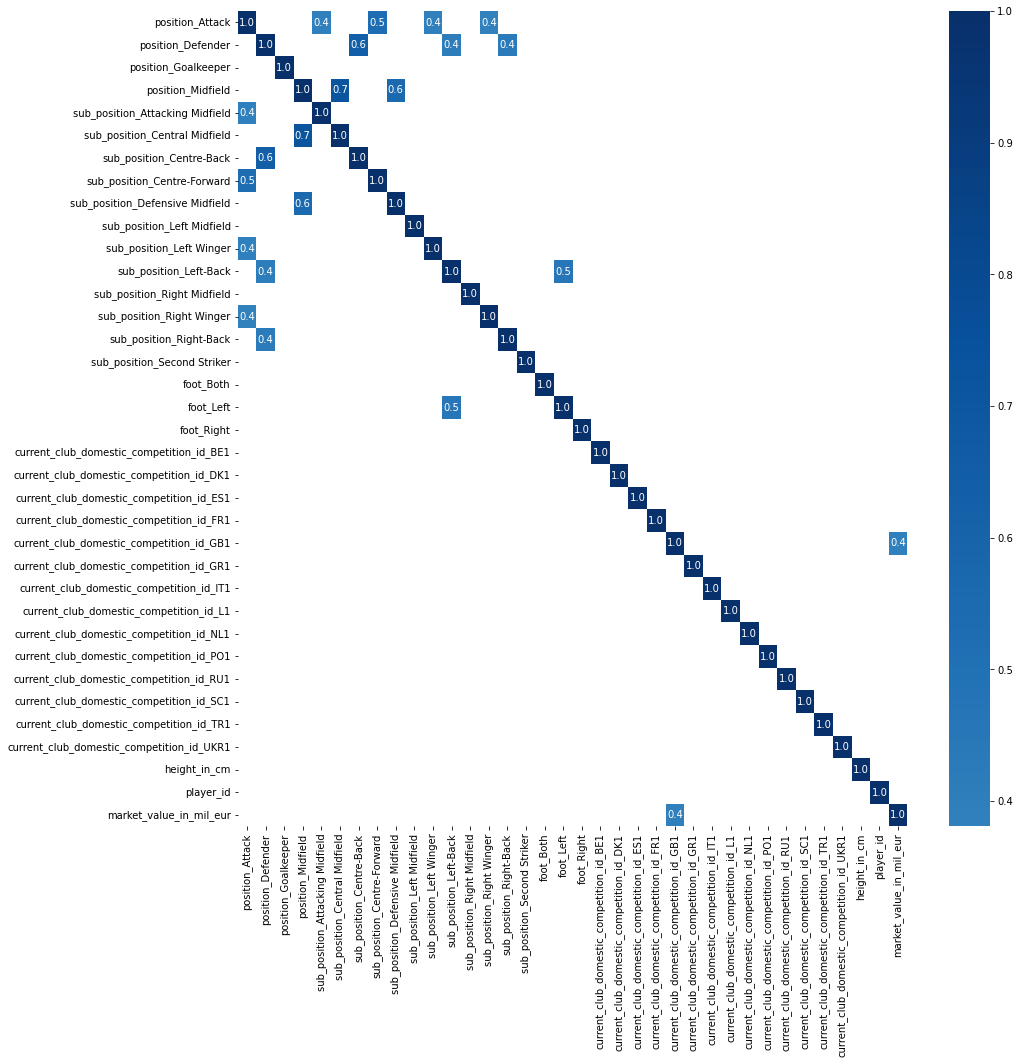

In [24]:
#correlation matrix of dummy variables
plt.figure(figsize=(15,15))
corr = players_dummy.corr()
corr_mod = corr[corr>=.2]
sns.heatmap(corr_mod, cmap="Blues", annot=True, fmt=".1f", center=0)

## 1.6 Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
#x,y 
df = players_dummy

y = players_dummy.market_value_in_mil_eur
X = players_dummy.iloc[:, 0:35]

In [60]:
#Split dataset into train and test

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1)


In [61]:
#normalize the independent variables
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [62]:
#train

model_lr = LinearRegression().fit(x_train,y_train)


In [63]:
print(model_lr.intercept_)
print(model_lr.coef_)


5.117393352485273
[8.02730012e+12 1.75181717e+13 3.08657042e+13 3.29380057e+13
 1.86702633e+13 4.17201560e+12 2.13038160e+13 2.46389249e+13
 3.41716429e+12 1.09539957e+12 1.91883506e+13 1.52178145e+13
 1.03318088e+12 1.88084417e+13 1.56921216e+13 5.54831955e+12
 3.25929232e-01 7.83845464e-01 7.07871348e-01 1.15123539e+13
 9.46932236e+12 1.16281589e+13 1.18969286e+13 1.18969286e+13
 1.05059789e+13 1.24621665e+13 1.15993581e+13 1.14831494e+13
 1.18969286e+13 1.09858077e+13 9.56268121e+12 1.18270323e+13
 1.05059789e+13 2.58789062e-01 2.85644531e-02]


In [64]:
#accuracy 
model_lr_pred_train = model_lr.predict(x_train)
model_lr_pred_test = model_lr.predict(x_test)

print("Training RSME:", np.sqrt(mean_squared_error(y_train,model_lr_pred_train)))
print("Training R2:", r2_score(y_train,model_lr_pred_train)*100)

print("Testing RSME:", np.sqrt(mean_squared_error(y_test,model_lr_pred_test)))
print("Testing R2:", r2_score(y_test,model_lr_pred_test)*100)


Training RSME: 9.678401902097319
Training R2: 24.70072842711045
Testing RSME: 5665777584508.049
Testing R2: -2.7666815264875817e+25


/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted response')

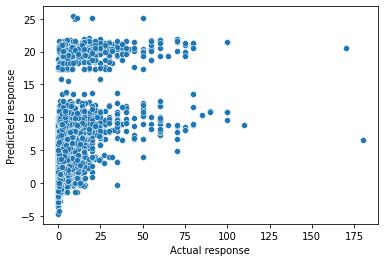

In [65]:
#predicted vs. actual plot by seaborn

ax = sns.scatterplot(y_train,model_lr_pred_train)

ax.set_xlabel('Actual response')
ax.set_ylabel('Predicted response')

### Key Facts:
- The model is not really good right now and has room for improvement
- So may be we should take a lokk at the personal player stats to improve our model

## 1.7 Linear Regression Model improvement

### 1.7.1 Add player stats like goals, assists and minutes played

In [66]:
appearances = pd.read_csv('appearances.csv')

In [67]:
appearances.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2483937_52453,2483937,52453,28095,28095,2014-08-08,Haris Handzic,RU1,0,0,0,0,90
1,2479929_67064,2479929,67064,28095,4128,2014-08-03,Felicio Brown Forbes,RU1,0,0,0,0,90
2,2483937_67064,2483937,67064,28095,4128,2014-08-08,Felicio Brown Forbes,RU1,0,0,0,0,90
3,2484582_67064,2484582,67064,28095,4128,2014-08-13,Felicio Brown Forbes,RU1,0,0,0,0,55
4,2485965_67064,2485965,67064,28095,4128,2014-08-16,Felicio Brown Forbes,RU1,0,0,0,0,90


In [68]:
appearances.shape

(1130649, 13)

In [69]:
competitions = pd.read_csv('competitions.csv')

In [70]:
competitions.head()

,competition_id,competition_code,name,type,sub_type,country_id,country_name,country_latitude,country_longitude,domestic_league_code,confederation,url
0,L1,bundesliga,Bundesliga,domestic_league,first_tier,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/bundesliga/sta...
1,DFB,dfb-pokal,Dfb Pokal,domestic_cup,domestic_cup,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/dfb-pokal/star...
2,DFL,dfl-supercup,Dfl Supercup,other,domestic_super_cup,40,Germany,51.163818,10.447831,L1,europa,https://www.transfermarkt.co.uk/dfl-supercup/s...
3,NL1,eredivisie,Eredivisie,domestic_league,first_tier,122,Netherlands,52.243498,5.634323,NL1,europa,https://www.transfermarkt.co.uk/eredivisie/sta...
4,NLP,toto-knvb-beker,Toto Knvb Beker,domestic_cup,domestic_cup,122,Netherlands,52.243498,5.634323,NL1,europa,https://www.transfermarkt.co.uk/toto-knvb-beke...


In [71]:
df = appearances.merge(competitions[['competition_id','name','type','sub_type']], on='competition_id', how='left')

In [72]:
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,name,type,sub_type
0,2483937_52453,2483937,52453,28095,28095,2014-08-08,Haris Handzic,RU1,0,0,0,0,90,Premier Liga,domestic_league,first_tier
1,2479929_67064,2479929,67064,28095,4128,2014-08-03,Felicio Brown Forbes,RU1,0,0,0,0,90,Premier Liga,domestic_league,first_tier
2,2483937_67064,2483937,67064,28095,4128,2014-08-08,Felicio Brown Forbes,RU1,0,0,0,0,90,Premier Liga,domestic_league,first_tier
3,2484582_67064,2484582,67064,28095,4128,2014-08-13,Felicio Brown Forbes,RU1,0,0,0,0,55,Premier Liga,domestic_league,first_tier
4,2485965_67064,2485965,67064,28095,4128,2014-08-16,Felicio Brown Forbes,RU1,0,0,0,0,90,Premier Liga,domestic_league,first_tier


In [73]:
df = df[df['date'].notnull()]

In [74]:
df = df[df['date'].str.contains("2022")]

In [75]:
df.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,name,type,sub_type
917058,3714221_45320,3714221,45320,583,506,2022-02-15,Ángel Di María,CL,0,0,0,0,73,Uefa Champions League,international_cup,uefa_champions_league
917059,3714229_45320,3714229,45320,583,506,2022-03-09,Ángel Di María,CL,0,0,0,0,9,Uefa Champions League,international_cup,uefa_champions_league
917073,3589335_45320,3589335,45320,583,506,2022-01-15,Ángel Di María,FR1,0,0,0,0,72,Ligue 1,domestic_league,first_tier
917074,3589359_45320,3589359,45320,583,506,2022-01-23,Ángel Di María,FR1,0,0,0,0,63,Ligue 1,domestic_league,first_tier
917075,3589360_45320,3589360,45320,583,506,2022-02-06,Ángel Di María,FR1,0,0,0,0,45,Ligue 1,domestic_league,first_tier


### 1.7.2 generate goals per competitions

In [76]:
goals = df.groupby(['player_id','type'])['goals'].sum().reset_index()
goals

,player_id,type,goals
0,3333,domestic_cup,0
1,3333,domestic_league,0
2,3333,international_cup,0
3,3333,other,0
4,3455,domestic_league,1
...,...,...,...
13004,1050249,domestic_league,0
13005,1050852,domestic_league,0
13006,1056907,domestic_cup,0
13007,1056907,domestic_league,0


In [77]:
goals_22 = goals.pivot(index='player_id',columns='type',values='goals').fillna(0).add_prefix('goals_')
goals_22

type,goals_domestic_cup,goals_domestic_league,goals_international_cup,goals_other
player_id,,,,
3333,0.0,0.0,0.0,0.0
3455,0.0,1.0,0.0,0.0
4188,0.0,1.0,0.0,0.0
4311,0.0,0.0,0.0,0.0
4391,0.0,0.0,0.0,0.0
...,...,...,...,...
1045972,0.0,0.0,0.0,0.0
1050249,0.0,0.0,0.0,0.0
1050852,0.0,0.0,0.0,0.0


### 1.7.3 generate assists per competitions

In [78]:
assists = df.groupby(['player_id','type'])['assists'].sum().reset_index()
assists_22 = assists.pivot(index='player_id',columns='type',values='assists').fillna(0).add_prefix('assists_')
assists_22

type,assists_domestic_cup,assists_domestic_league,assists_international_cup,assists_other
player_id,,,,
3333,0.0,1.0,0.0,1.0
3455,0.0,1.0,0.0,0.0
4188,0.0,0.0,0.0,0.0
4311,0.0,0.0,0.0,0.0
4391,0.0,0.0,0.0,0.0
...,...,...,...,...
1045972,1.0,1.0,0.0,0.0
1050249,0.0,0.0,0.0,0.0
1050852,0.0,0.0,0.0,0.0


### 1.7.4 generate minutes played per competitions

In [79]:
minutes = df.groupby(['player_id','type'])['minutes_played'].sum().reset_index()
minutes_22 = minutes.pivot(index='player_id',columns='type',values='minutes_played').fillna(0).add_prefix('minutes_')
minutes_22

type,minutes_domestic_cup,minutes_domestic_league,minutes_international_cup,minutes_other
player_id,,,,
3333,157.0,782.0,219.0,54.0
3455,0.0,303.0,0.0,0.0
4188,0.0,210.0,0.0,0.0
4311,90.0,360.0,0.0,0.0
4391,0.0,630.0,0.0,0.0
...,...,...,...,...
1045972,136.0,228.0,0.0,0.0
1050249,0.0,137.0,0.0,0.0
1050852,0.0,45.0,0.0,0.0


### 1.7.5 generate yellow card per competitions

In [80]:
yellow = df.groupby(['player_id','type'])['yellow_cards'].sum().reset_index()
yellow_22 = yellow.pivot(index='player_id',columns='type',values='yellow_cards').fillna(0).add_prefix('yellow_')
yellow_22

type,yellow_domestic_cup,yellow_domestic_league,yellow_international_cup,yellow_other
player_id,,,,
3333,0.0,0.0,1.0,0.0
3455,0.0,1.0,0.0,0.0
4188,0.0,3.0,0.0,0.0
4311,0.0,0.0,0.0,0.0
4391,0.0,0.0,0.0,0.0
...,...,...,...,...
1045972,0.0,2.0,0.0,0.0
1050249,0.0,0.0,0.0,0.0
1050852,0.0,0.0,0.0,0.0


### 1.7.6 generate red cards per competitions

In [81]:
red = df.groupby(['player_id','type'])['red_cards'].sum().reset_index()
red_22 = red.pivot(index='player_id',columns='type',values='red_cards').fillna(0).add_prefix('red_')
red_22

type,red_domestic_cup,red_domestic_league,red_international_cup,red_other
player_id,,,,
3333,0.0,0.0,0.0,0.0
3455,0.0,0.0,0.0,0.0
4188,0.0,0.0,0.0,0.0
4311,0.0,0.0,0.0,0.0
4391,0.0,0.0,0.0,0.0
...,...,...,...,...
1045972,0.0,0.0,0.0,0.0
1050249,0.0,0.0,0.0,0.0
1050852,0.0,0.0,0.0,0.0


### 1.7.7 dummy variables

In [92]:
players_dummy2 = red_22.merge(players_dummy, on="player_id",how='right')
players_dummy2 = yellow_22.merge(players_dummy2, on="player_id",how='right')
players_dummy2 = minutes_22.merge(players_dummy2, on="player_id",how='right')
players_dummy2 = assists_22.merge(players_dummy2, on="player_id",how='right')
players_dummy2 = goals_22.merge(players_dummy2, on="player_id",how='right')
players_dummy2 = players_dummy2.fillna(0)
players_dummy2

,player_id,goals_domestic_cup,goals_domestic_league,goals_international_cup,goals_other,assists_domestic_cup,assists_domestic_league,assists_international_cup,assists_other,minutes_domestic_cup,...,current_club_domestic_competition_id_IT1,current_club_domestic_competition_id_L1,current_club_domestic_competition_id_NL1,current_club_domestic_competition_id_PO1,current_club_domestic_competition_id_RU1,current_club_domestic_competition_id_SC1,current_club_domestic_competition_id_TR1,current_club_domestic_competition_id_UKR1,height_in_cm,market_value_in_mil_eur
0,987700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,...,0,0,0,0,1,0,0,0,175,0.30
1,185245,4.0,5.0,0.0,0.0,1.0,3.0,0.0,0.0,462.0,...,0,0,0,0,1,0,0,0,188,11.00
2,241486,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,171.0,...,0,0,1,0,0,0,0,0,180,0.45
3,401931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,...,0,0,0,1,0,0,0,0,192,0.30
4,322073,0.0,8.0,0.0,0.0,0.0,3.0,0.0,0.0,230.0,...,0,0,1,0,0,0,0,0,187,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6473,582232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,...,0,0,0,0,1,0,0,0,192,1.00
6474,518472,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,322.0,...,0,0,0,0,1,0,0,0,191,3.00
6475,289643,1.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,367.0,...,0,0,0,0,1,0,0,0,170,1.20
6476,213429,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,450.0,...,0,0,0,0,1,0,0,0,195,0.80


### 1.7.8 Linear Regression

In [93]:
#x,y

y = players_dummy2.market_value_in_mil_eur
X = players_dummy2.iloc[:, 0:55]

In [94]:
X.notnull().sum()

player_id                                    6478
goals_domestic_cup                           6478
goals_domestic_league                        6478
goals_international_cup                      6478
goals_other                                  6478
assists_domestic_cup                         6478
assists_domestic_league                      6478
assists_international_cup                    6478
assists_other                                6478
minutes_domestic_cup                         6478
minutes_domestic_league                      6478
minutes_international_cup                    6478
minutes_other                                6478
yellow_domestic_cup                          6478
yellow_domestic_league                       6478
yellow_international_cup                     6478
yellow_other                                 6478
red_domestic_cup                             6478
red_domestic_league                          6478
red_international_cup                        6478


In [95]:
#Split dataset into train and test

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 1)


In [96]:
#normalize the independent variables
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [97]:
#train

model_lr2 = LinearRegression().fit(x_train,y_train)


In [98]:
print(model_lr2.intercept_)
print(model_lr2.coef_)


5.114937522165779
[ 1.49469818e+00  5.74451632e-02  2.36546371e+00  1.03876132e+00
  3.62977047e-01 -2.48949637e-01  1.15756593e+00  7.29629086e-01
  4.59240793e-02  3.16519278e-01  1.07209843e+00  2.64308878e+00
  9.51332254e-01 -9.65933352e-03  2.42256833e-01 -2.14282596e-01
  4.31530979e-01 -8.37780781e-02 -1.97427700e-01 -1.88834305e-01
  5.84151376e-03  1.11962780e+12  1.20037332e+12  2.82452054e+11
  7.37208146e+11 -3.78525315e+11 -3.09474581e+11 -6.38001862e+11
 -4.99535368e+11 -2.53480713e+11 -8.12552866e+10 -3.89029141e+11
 -4.55739666e+11 -7.66399867e+10 -3.81326778e+11 -4.69944107e+11
 -1.12487938e+11  2.72949219e-01  4.89746094e-01  4.75311279e-01
 -2.57273670e+11 -2.11616786e+11 -2.59861638e+11 -2.65867999e+11
 -2.65867999e+11 -2.34783588e+11 -2.78499718e+11 -2.59218007e+11
 -2.56621020e+11 -2.65867999e+11 -2.45506619e+11 -2.13703133e+11
 -2.64305984e+11 -2.34783588e+11  2.07519531e-02]


In [99]:
#accuracy 
model_lr2_pred_train = model_lr2.predict(x_train)
model_lr2_pred_test = model_lr2.predict(x_test)

print("Training RSME:", np.sqrt(mean_squared_error(y_train,model_lr2_pred_train)))
print("Training R2:", r2_score(y_train,model_lr2_pred_train)*100)

print("Testing RSME:", np.sqrt(mean_squared_error(y_test,model_lr2_pred_test)))
print("Testing R2:", r2_score(y_test,model_lr2_pred_test)*100)


Training RSME: 7.444285017147393
Training R2: 55.451872405575806
Testing RSME: 94555164193.17766
Testing R2: -7.7056740200975e+21


/home/jovyan/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted response')

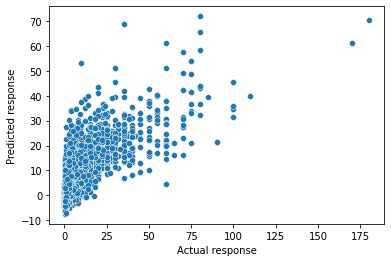

In [100]:
#predicted vs. actual plot by seaborn

ax = sns.scatterplot(y_train,model_lr2_pred_train)

ax.set_xlabel('Actual response')
ax.set_ylabel('Predicted response')

### Key Facts:
- The model is still no really good right now even it is twice as good as before
- So to get a better model fit there are better variables needed